<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.datasets import load_digits
digits = load_digits() #загрузили датасет

In [10]:
X = digits.data
y = digits.target
N, d = X.shape

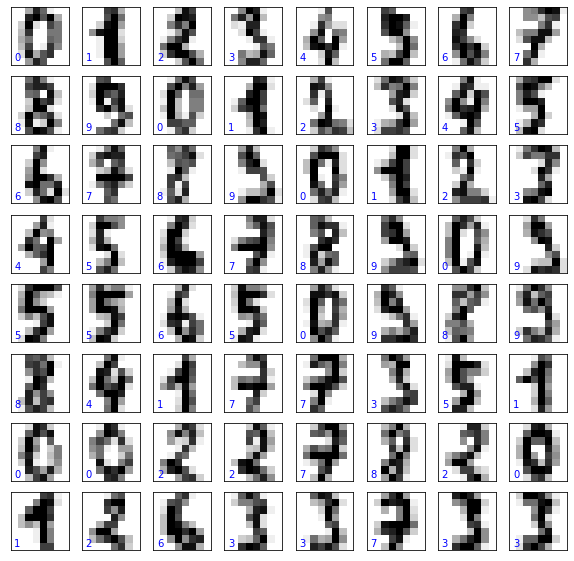

In [11]:
plt.figure(figsize = (10, 10)) # Размер окна в дюймах
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(X[i, :], (8, 8)))
    plt.text(0, 7, str(digits.target[i]), color = 'b')
    plt.set_cmap('binary')

In [16]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 7)
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

In [17]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))

0.9865319865319865


In [18]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[63,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 57,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 58,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 67,  0],
       [ 0,  1,  0,  2,  0,  1,  0,  0,  0, 58]])

(30.0, 0.0)

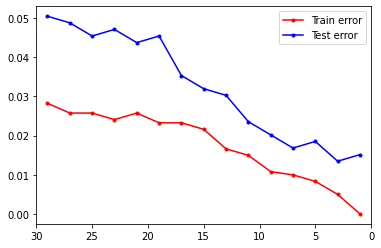

In [21]:
kk = range(1, 30, 2)
err_train = []
err_test = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 1)
plt.xlim([30, 0])

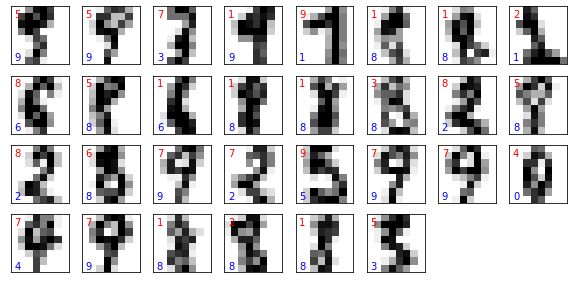

In [22]:
i=1
plt.figure(figsize = (10, 10)) # Размер окна в дюймах
i_subplot = 1 
yi_test_pred =model.predict(X_test)
N_test = X_test.shape[0]
for i in range(N_test):
    if yi_test_pred[i]!= y_test[i]:
        plt.subplot(8, 8, i_subplot)
        i_subplot += 1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.reshape(X_test[i, :], (8, 8)), cmap = plt.cm.binary)
        plt.text(0, 7, str(y_test[i]),    color = 'b')        
        plt.text(0, 1, str(yi_test_pred[i]), color = 'r')